In [1]:
import tfcomb
C = tfcomb.CombObj(verbosity=0)

In [2]:
C.TFBS_from_motifs(regions="/mnt/workspace_stud/stud4/WP6_data/right-lobe-of-liver.6.bed", 
                   motifs="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/JASPAR2020_CORE_vertebrates.meme",
                   genome="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/homo_sapiens.104.mainChr.fa", 
                   threads=8)


#### running count_within() with stranded option turned on

In [3]:
C.count_within(stranded=True, threads=8)
C.market_basket()

### Analyze preferential orientation of motifs

##### First, we create a directionality analysis for the rules found:


In [4]:
df_orientation = C.analyze_orientation()

INFO: Rules are symmetric - scenarios counted are: ['same', 'opposite']


In [5]:
df_orientation.head()

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
KLF15-KLF5,KLF15,KLF5,1142,0.878284,0.121716,0.534974,3.548431e-144
KLF15-SP1,KLF15,SP1,659,0.892261,0.107739,0.554741,3.329418e-90
KLF5-SP3,KLF5,SP3,647,0.891808,0.108192,0.554101,2.138332e-88
KLF5-SP1,KLF5,SP1,596,0.906040,0.093960,0.574228,1.797019e-87
KLF15-SP3,KLF15,SP3,721,0.864078,0.135922,0.514884,3.964926e-85


We can subset these on pvalue and number of sites:

In [6]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.01)
              & (df_orientation["TF1_TF2_count"] > 50)]

In [7]:
#Number of TF pairs with significant differences in orientation
orientation_selected.shape[0]

276

### Visualization of orientation preference

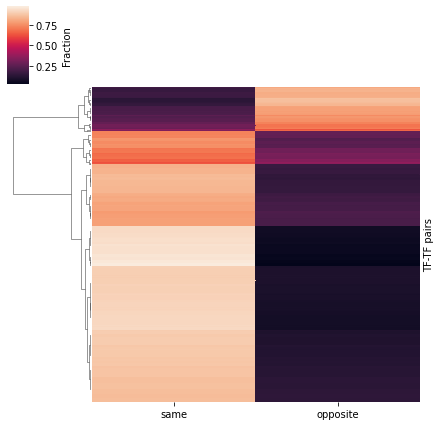

In [8]:
orientation_heatmap=orientation_selected.plot_heatmap()

We can select the subsets by investigating the selected pairs:

In [9]:
#orientation_selected.sort_values("same").tail(5)

In [10]:
#orientation_selected.sort_values("opposite").tail(5)


### Extended analysis with directional=True

#### The first analysis presented does not take into account the relative order of TF1-TF2, e.g. if the orientation "same" represents "TF1-TF2" or


In [11]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()


In [12]:
df_orientation = C.analyze_orientation()

INFO: Rules are directional - scenarios counted are: ['TF1-TF2', 'TF2-TF1', 'convergent', 'divergent']


In [13]:
df_orientation.head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF15-KLF15,KLF15,KLF15,1355,0.459779,0.459779,0.028044,0.052399,0.242435,7.399097e-207
KLF5-KLF5,KLF5,KLF5,987,0.475177,0.475177,0.016211,0.033435,0.260107,2.242852e-173
KLF15-KLF5,KLF15,KLF5,1142,0.446585,0.431699,0.040280,0.081436,0.219132,2.619358e-142
SP1-SP1,SP1,SP1,494,0.483806,0.483806,0.008097,0.024291,0.270056,2.193574e-93
KLF15-SP1,KLF15,SP1,659,0.450683,0.441578,0.034901,0.072838,0.227031,4.989404e-88


similarly to the first analysis, we can select the significant pairs and visualize the preferences for orientation:

In [14]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.05)
              & (df_orientation["TF1_TF2_count"] > 50)]             

In [15]:
orientation_selected.shape[0]

292

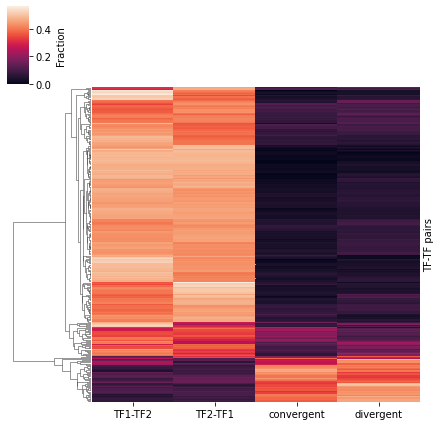

In [16]:
orientation_heatmap = orientation_selected.plot_heatmap()


### In-depth look at preferential orientation



By sorting the selected co-occurring TF pairs, it is also possible to visualize the top pairs within each scenario as seen below.


#### TFs specific in TF1-TF2 orientation

In [17]:
orientation_selected.sort_values("TF1-TF2", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF13-SP1,KLF13,SP1,54,0.555556,0.388889,0.018519,0.037037,0.265576,6.556787e-10
KLF14-KLF3,KLF14,KLF3,56,0.553571,0.410714,0.000000,0.035714,0.274714,5.628097e-11
KLF10-KLF11,KLF10,KLF11,80,0.550000,0.375000,0.037500,0.037500,0.255563,1.556717e-13
KLF10-Klf12,KLF10,Klf12,54,0.537037,0.407407,0.018519,0.037037,0.262110,1.171070e-09
KLF10-KLF15,KLF10,KLF15,109,0.532110,0.302752,0.082569,0.082569,0.214814,4.929489e-13
KLF13-SP3,KLF13,SP3,51,0.529412,0.392157,0.039216,0.039216,0.249760,2.593475e-08
Klf12-SP2,Klf12,SP2,53,0.528302,0.415094,0.037736,0.018868,0.260247,2.371853e-09
KLF10-KLF16,KLF10,KLF16,99,0.525253,0.373737,0.040404,0.060606,0.238660,1.348277e-14
KLF14-Klf12,KLF14,Klf12,65,0.523077,0.430769,0.015385,0.030769,0.264799,7.986436e-12
KLF2-Klf12,KLF2,Klf12,66,0.515152,0.424242,0.015152,0.045455,0.256683,2.739413e-11


#### TFs specific in TF2-TF1 orientation

In [18]:
orientation_selected.sort_values("TF2-TF1", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF2-SP8,KLF2,SP8,89,0.359551,0.561798,0.056180,0.022472,0.257264,3.044286e-15
KLF11-KLF3,KLF11,KLF3,68,0.382353,0.529412,0.029412,0.058824,0.245490,1.196356e-10
SP2-SP8,SP2,SP8,161,0.391304,0.527950,0.031056,0.049689,0.248518,1.079545e-25
KLF11-KLF4,KLF11,KLF4,52,0.346154,0.519231,0.076923,0.057692,0.222612,8.823472e-07
KLF9-SP8,KLF9,SP8,70,0.371429,0.514286,0.057143,0.057143,0.230203,1.173498e-09
KLF11-KLF6,KLF11,KLF6,82,0.402439,0.512195,0.036585,0.048780,0.243597,1.297434e-12
KLF11-SP8,KLF11,SP8,184,0.402174,0.510870,0.048913,0.038043,0.242605,5.526409e-28
KLF10-SP8,KLF10,SP8,51,0.411765,0.509804,0.039216,0.039216,0.246662,4.103008e-08
SP2-SP4,SP2,SP4,253,0.422925,0.505929,0.035573,0.035573,0.249907,7.415436e-41
KLF15-ZNF740,KLF15,ZNF740,62,0.403226,0.500000,0.048387,0.048387,0.236131,5.162807e-09



#### TFs specific in convergent orientation

In [19]:
orientation_selected.sort_values("convergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
KLF14-Zfx,KLF14,Zfx,66,0.060606,0.106061,0.469697,0.363636,0.198132,8.133945e-07
SP2-Zfx,SP2,Zfx,90,0.044444,0.088889,0.466667,0.400000,0.214207,9.934518e-11
SP4-Zfx,SP4,Zfx,141,0.049645,0.085106,0.460993,0.404255,0.212638,1.725108e-16
SP9-ZNF263,SP9,ZNF263,52,0.076923,0.134615,0.442308,0.346154,0.172720,3.283102e-04
ZNF148-ZNF263,ZNF148,ZNF263,104,0.115385,0.086538,0.442308,0.355769,0.176078,2.016707e-08
KLF15-PLAG1,KLF15,PLAG1,62,0.080645,0.096774,0.435484,0.387097,0.187402,8.962146e-06
KLF15-TFDP1,KLF15,TFDP1,63,0.142857,0.095238,0.428571,0.333333,0.157335,3.132217e-04
SP3-Zfx,SP3,Zfx,146,0.075342,0.089041,0.424658,0.410959,0.193930,3.235024e-14
SP8-Zfx,SP8,Zfx,69,0.115942,0.101449,0.420290,0.362319,0.164978,5.044599e-05
CTCFL-SP4,CTCFL,SP4,72,0.097222,0.083333,0.416667,0.402778,0.184606,1.806028e-06


#### TFs specific in divergent orientation

In [20]:
orientation_selected.sort_values("divergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
EWSR1-FLI1-ZNF148,EWSR1-FLI1,ZNF148,55,0.072727,0.072727,0.345455,0.509091,0.215322,1.031929e-06
KLF15-TFAP2Cvar.2,KLF15,TFAP2Cvar.2,55,0.127273,0.127273,0.254545,0.490909,0.171447,2.259703e-04
CTCFL-KLF11,CTCFL,KLF11,51,0.098039,0.058824,0.352941,0.490196,0.206504,9.097082e-06
CTCFL-SP3,CTCFL,SP3,74,0.081081,0.108108,0.324324,0.486486,0.191587,3.921439e-07
SP1-Zfx,SP1,Zfx,155,0.051613,0.083871,0.393548,0.470968,0.213221,3.223463e-18
SP1-ZNF263,SP1,ZNF263,54,0.074074,0.092593,0.370370,0.462963,0.196273,1.571828e-05
CTCFL-SP8,CTCFL,SP8,52,0.076923,0.076923,0.384615,0.461538,0.202304,1.191336e-05
CTCFL-KLF16,CTCFL,KLF16,78,0.128205,0.076923,0.346154,0.448718,0.176563,2.053138e-06
KLF16-Zfx,KLF16,Zfx,137,0.072993,0.094891,0.386861,0.445255,0.193431,2.794983e-13
SP9-Zfx,SP9,Zfx,135,0.081481,0.096296,0.377778,0.444444,0.188113,2.189454e-12


 #### .loc-operator to show the results of a subset of TF1-TF2-pairs:

In [21]:
#df_orientation.loc[["EGR1-MYOD1","SP1-SP1","WT1-ZFP82"]]

In [22]:
TF_pairs =list(orientation_selected[["TF1","TF2"]].itertuples(index=False, name=None)) 
len(TF_pairs)


292

In [23]:
#selection=cobj.select_custom_rules(names)
#selection=df.select_custom_rules(names)
#selection=C.select_custom_rules(names)
#selection=selected.select_custom_rules(names)

In [24]:
from tfcomb import CombObj
genome_path="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/homo_sapiens.104.mainChr.fa"
motif_path="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/JASPAR2020_CORE_vertebrates.meme"
result_path="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse/results/wp2/main/"

In [41]:
Liver_object = CombObj().from_pickle(f"{result_path}right-lobe-of-liver.11.pkl")

In [42]:
TF_pairs_of_orientation_for_distance=Liver_object.select_custom_rules(TF_pairs)

In [43]:
TF_pairs_of_orientation_for_distance.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
0,KLF15,KLF15,3274,7250,7250,0.451586,90.828663
1,KLF5,KLF5,2360,5497,5497,0.429325,124.788372
2,KLF15,KLF5,4983,7250,5497,0.789331,126.958045
3,SP1,SP1,1154,3106,3106,0.371539,110.448701
4,KLF15,SP1,3003,7250,3106,0.632828,112.334544
...,...,...,...,...,...,...,...
287,Arnt,SP9,251,2115,3558,0.091499,6.534704
288,AhrArnt,ZNF148,354,2838,5174,0.092381,2.497011
289,SP4,ZNF460,323,2925,4359,0.090458,3.578890
290,ZBTB14,ZNF148,316,1086,5174,0.133309,16.645737


In [45]:
TF_pairs_of_orientation_for_distance.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [46]:
TF_pairs_of_orientation_for_distance.distObj.evaluate_noise(threads=6)

INFO: Evaluating noisiness of the signals with 6 threads


In [47]:
TF_pairs_of_orientation_for_distance.distObj.rank_rules()

In [48]:
TF_pairs_of_orientation_for_distance.distObj.peaks

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
461,ZNF460,ZNF460,16,5.674030,6.077854,2,606,0.618812,0.02462,1.0,1.0,1.0,1.000000
142,KLF14,Klf12,5,5.140175,6.566092,2,283,0.144876,0.157105,2.0,2.0,13.0,5.666667
417,SP3,ZNF460,23,4.592319,5.644359,2,543,0.117864,0.086933,22.0,8.0,3.0,11.000000
445,SP9,ZNF460,23,4.547436,5.611374,2,553,0.117541,0.077267,24.0,10.0,2.0,12.000000
354,Klf12,SP8,6,4.872321,6.300320,2,266,0.142857,0.191204,3.0,4.0,65.0,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,KLF15,TFDP1,82,2.193007,3.861656,2,302,0.046358,0.339363,399.0,375.0,265.0,346.333333
122,KLF11,ZNF460,0,2.095532,2.095532,2,252,0.039683,0.268451,419.0,420.0,202.0,347.000000
164,KLF15,KLF4,52,2.013247,3.687988,2,832,0.049279,0.270894,386.0,453.0,203.0,347.333333
274,KLF4,SP1,41,2.036967,3.816020,2,389,0.053985,0.323521,358.0,443.0,255.0,352.000000


In [49]:
df_orientation_distance=TF_pairs_of_orientation_for_distance.distObj.peaks.merge(orientation_selected, left_on =["TF1","TF2"], right_on = ["TF1","TF2"])

In [138]:
df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)]
#df_orientation_distance

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
0,ZNF460,ZNF460,16,5.674030,6.077854,2,606,0.618812,0.02462,1.0,1.0,1.0,1.000000,93,0.430108,0.430108,0.075269,0.064516,0.208017,1.847095e-10
1,KLF14,Klf12,5,5.140175,6.566092,2,283,0.144876,0.157105,2.0,2.0,13.0,5.666667,65,0.523077,0.430769,0.015385,0.030769,0.264799,7.986436e-12
2,SP3,ZNF460,23,4.592319,5.644359,2,543,0.117864,0.086933,22.0,8.0,3.0,11.000000,91,0.340659,0.362637,0.186813,0.109890,0.121833,1.027511e-03
4,SP9,ZNF460,23,4.547436,5.611374,2,553,0.117541,0.077267,24.0,10.0,2.0,12.000000,92,0.282609,0.391304,0.206522,0.119565,0.115375,2.096101e-03
6,Klf12,SP8,6,4.872321,6.300320,2,266,0.142857,0.191204,3.0,4.0,65.0,24.000000,57,0.438596,0.473684,0.035088,0.052632,0.238569,1.796106e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,KLF6,ZNF148,26,2.846730,4.819672,2,232,0.081897,0.295205,178.0,192.0,229.0,199.666667,53,0.509434,0.226415,0.075472,0.188679,0.184466,7.745004e-05
338,Wt1,ZNF148,6,2.936753,4.506708,2,839,0.075089,0.287056,218.0,171.0,223.0,204.000000,117,0.316239,0.461538,0.085470,0.136752,0.172270,4.721762e-09
347,KLF16,SP2,6,2.953083,4.951970,2,1177,0.084112,0.463725,163.0,169.0,289.0,207.000000,242,0.475207,0.429752,0.033058,0.061983,0.234835,1.702265e-34
348,ZNF148,ZNF460,0,3.232117,3.232117,2,685,0.040876,0.204624,416.0,117.0,91.0,208.000000,122,0.344262,0.344262,0.163934,0.147541,0.109050,5.819998e-04


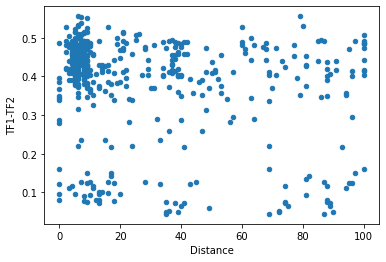

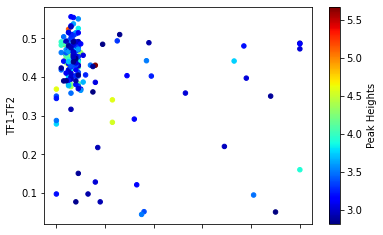

In [60]:
plot_distance_T1_TF2=df_orientation_distance.plot(x ='Distance', y='TF1-TF2', kind = 'scatter')
plot_distance_T1_TF2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='TF1-TF2', kind = 'scatter', c='Peak Heights', colormap='jet')


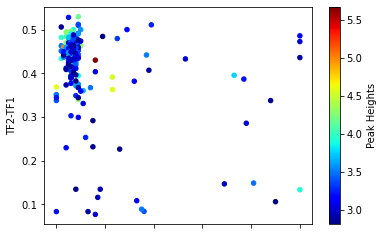

In [61]:
plot_distance_T2_TF1=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='TF2-TF1', kind = 'scatter',c='Peak Heights', colormap='jet')

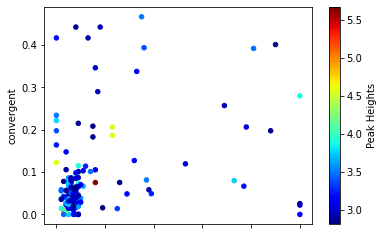

In [64]:
plot_distance_convergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='convergent', kind = 'scatter',c='Peak Heights', colormap='jet')

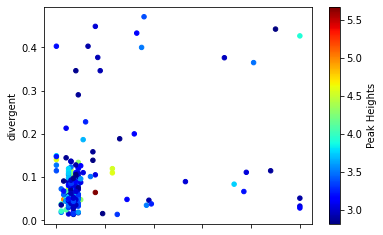

In [65]:
plot_distance_divergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(x ='Distance', y='divergent', kind = 'scatter',c='Peak Heights', colormap='jet')

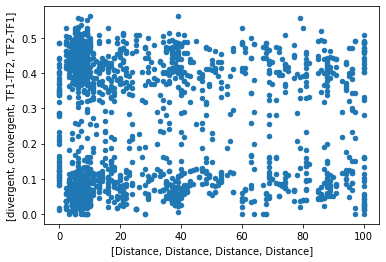

In [55]:
plot_distance=df_orientation_distance.plot(x = ['Distance','Distance','Distance','Distance'], y=['divergent','convergent','TF1-TF2','TF2-TF1'],kind='scatter')


Text(0, 0.5, 'orientation')

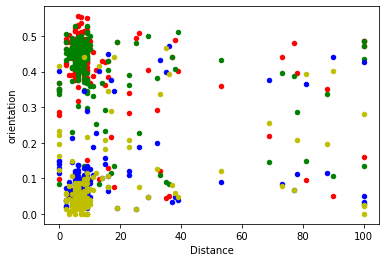

In [66]:
ax1 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF1-TF2', color='r')    
ax2 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='TF2-TF1', color='g', ax=ax1)    
ax3 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='divergent', color='b', ax=ax1)
ax4 = df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].plot(kind='scatter', x='Distance', y='convergent', color='y', ax=ax1)
ax1.set_ylabel("orientation")

#print(ax1 == ax2 == ax3 == ax4)


#### how many of the top 50 of each orentaion have a preferential distance

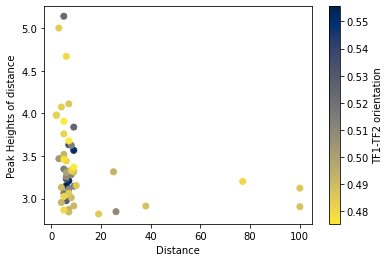

In [170]:
import matplotlib.pyplot as plt

plt.scatter(df_top50_T1_TF2['Distance'], df_top50_T1_TF2['Peak Heights'], c= df_top50_T1_TF2['TF1-TF2'], cmap = 'cividis_r')

cbar = plt.colorbar()
cbar.set_label("TF1-TF2 orientation")

plt.xlabel("Distance")
plt.ylabel("Peak Heights of distance")

plt.show()

<module 'matplotlib.cm' from '/home/stud7/.conda/envs/tfcomb_env/lib/python3.7/site-packages/matplotlib/cm.py'>

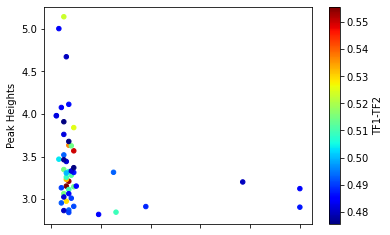

In [129]:
df_top50_T1_TF2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF1-TF2'], ascending=False).head(50)
plot_top50_distance_T1_TF2=df_top50_T1_TF2.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='TF1-TF2', colormap='jet')


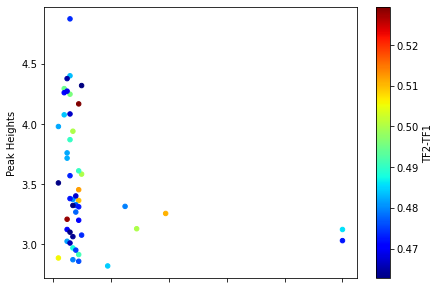

In [128]:
df_top50_T2_TF1=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF2-TF1'], ascending=False).head(50)
plot_top50_distance_T2_TF1=df_top50_T2_TF1.plot(x='Distance', y='Peak Heights', kind = 'scatter', xlabel='testtt', c='TF2-TF1', colormap='jet', figsize=(7,5), )


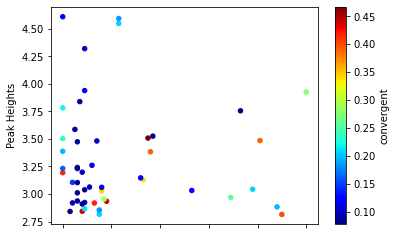

In [69]:
df_top50_convergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['convergent'], ascending=False).head(50)
plot_top50_distance_convergent=df_top50_convergent.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='convergent', colormap='jet')


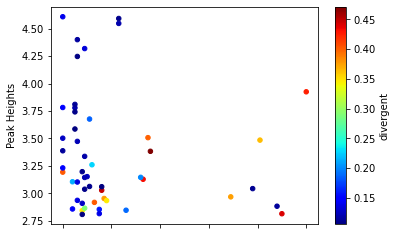

In [70]:
df_top50_divergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['divergent'], ascending=False).head(50)
plot_top50_distance_divergent=df_top50_divergent.plot(x ='Distance', y='Peak Heights', kind = 'scatter', c='divergent', colormap='jet')
